In [193]:
import pandas as pd
from datetime import datetime

df_netflix = pd.read_csv('./dataset/netflixdailytop10.csv')

df_netflix.head(20)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [194]:
# Tipos de dados disponíveis
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [195]:
# Dimensão da base de dados
df_netflix.shape

(7100, 10)

In [196]:
# Infos estatísticas
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [197]:
# Verificando valores ausentes
df_netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### Período da análise


In [198]:
# Transformando As of e Release date em data

df_netflix['As of'] = pd.to_datetime(df_netflix['As of'])

df_netflix['Netflix Release Date'] = pd.to_datetime(df_netflix['Netflix Release Date'])

In [199]:
# Início da análise

inicio = pd.to_datetime(df_netflix['As of'].min())
inicio_formatado = inicio.strftime("%d/%m/%Y")

# Fim da análise
fim = pd.to_datetime(df_netflix['As of'].max())
fim_formatado = fim.strftime("%d/%m/%Y")

inicio_formatado,fim_formatado

('01/04/2020', '11/03/2022')

In [200]:
# Período formatado
print(f"A análise começou em {inicio_formatado} e durou até {fim_formatado}")

A análise começou em 01/04/2020 e durou até 11/03/2022


In [201]:
# Criando novo dataframe sem valores nulos
df_netflix2 = df_netflix.dropna(axis=0)

<Axes: >

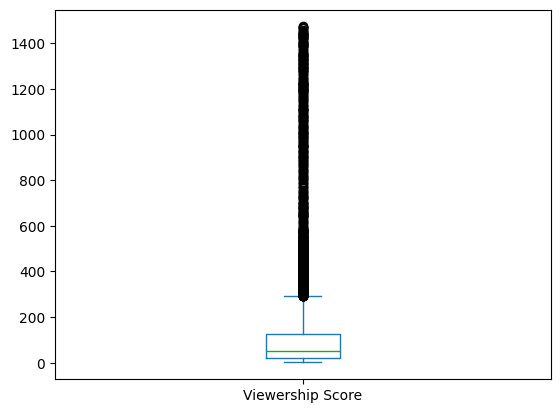

In [202]:
# Verificando outliers - Viewership score e tipo
df_netflix['Viewership Score'].plot.box()

In [203]:
# Qual a maior pontuação
df_netflix[df_netflix['Viewership Score'] == df_netflix['Viewership Score'].max()]


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,2020-06-01,428,1474


Viewership Score    Axes(0.125,0.11;0.775x0.77)
dtype: object

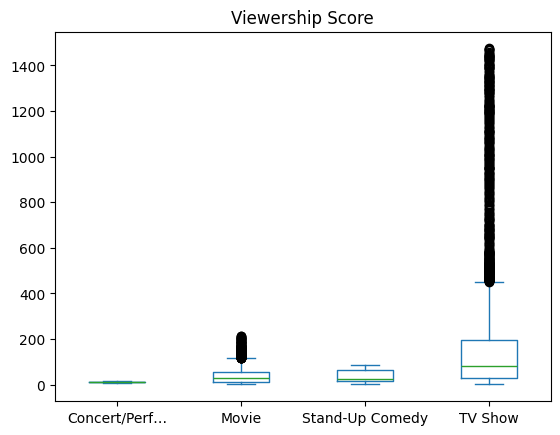

In [204]:
# Verificando outliers - Viewership score e tipo
df_netflix.plot.box(column="Viewership Score", by="Type")


In [215]:
# Qual ficou mais tempo no top 10 

df_netflix[df_netflix['Days In Top 10'] == df_netflix['Days In Top 10'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,2020-06-01,428,1474


Days In Top 10    Axes(0.125,0.11;0.775x0.77)
dtype: object

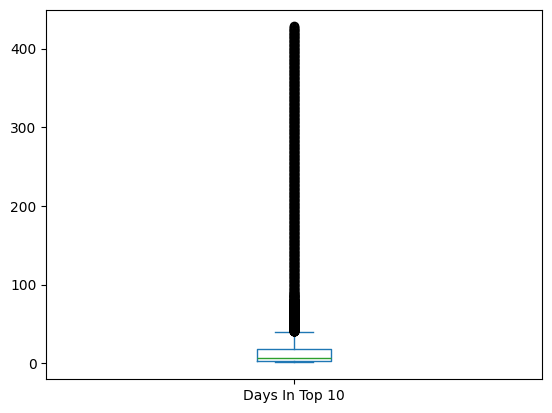

In [205]:
# Verificando outliers - Days in top 10 
df_netflix['Days In Top 10'].plot.box(subplots=True)

Days In Top 10    Axes(0.125,0.11;0.775x0.77)
dtype: object

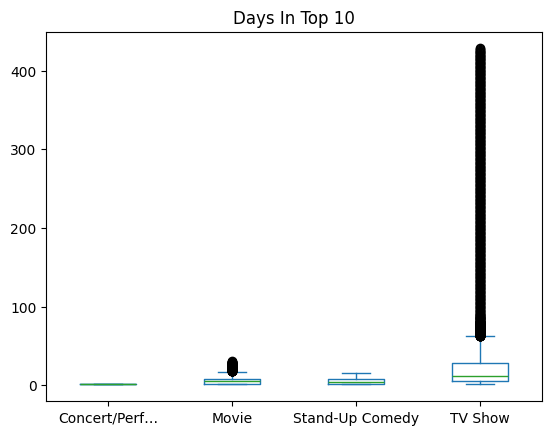

In [206]:
# Verificando outliers - Days in top 10 e tipo
df_netflix.plot.box(column="Days In Top 10", by="Type")


Days in Top 10 e Viewership Score possuem diversos outliers

### Método Tukey para detectar outliers - Days in top 10

In [207]:
# Dataframe somente com filmes que passaram mais de 15 dias no top 10
df_movies = df_netflix[df_netflix['Days In Top 10'] > 15]

In [208]:
q1_movies = df_movies['Days In Top 10'].quantile(0.25)
q3_movies = df_movies['Days In Top 10'].quantile(0.75)
iqr_movies = q3_movies - q1_movies

iqr_movies

np.float64(36.0)

In [209]:
limInf_movies = q1_movies - (iqr_movies *1.5)
limSup_movies = q1_movies + (iqr_movies *1.5)
limInf_movies,limSup_movies

(np.float64(-33.0), np.float64(75.0))

In [210]:
len(df_movies[(df_movies['Days In Top 10'] < limInf_movies) | (df_movies['Days In Top 10'] > limSup_movies)])

378

### Método Tukey para detectar outliers - Viewership Score

In [211]:
# Criando dataframe com filmes com 100 ou mais pontos

df_highViewershipScore = df_netflix[df_netflix['Viewership Score'] > 100]

df_highViewershipScore


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
20,2020-04-03,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,11,110
30,2020-04-04,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,12,120
40,2020-04-05,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,13,130
44,2020-04-05,5,4,3,All American,TV Show,NaN,2019-03-28,13,105
50,2020-04-06,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,14,140
...,...,...,...,...,...,...,...,...,...,...
7083,2022-03-10,4,3,3,Inventing Anna,TV Show,Yes,2022-02-11,27,243
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,2020-02-13,45,306
7092,2022-03-11,3,3,-,Good Girls,TV Show,NaN,2019-01-01,26,149
7093,2022-03-11,4,4,3,Inventing Anna,TV Show,Yes,2022-02-11,28,250


In [212]:
q1_highViewershipScore = df_highViewershipScore['Viewership Score'].quantile(0.25)
q3_highViewershipScore = df_highViewershipScore['Viewership Score'].quantile(0.75)
iqr_highViewershipScore = q3_highViewershipScore - q1_movies

iqr_highViewershipScore

np.float64(340.0)

In [213]:
limInf_highViewershipScore = q1_highViewershipScore - (iqr_highViewershipScore *1.5)
limSup_highViewershipScore = q1_highViewershipScore + (iqr_highViewershipScore *1.5)
limInf_highViewershipScore,limSup_highViewershipScore

(np.float64(-369.0), np.float64(651.0))

In [214]:
len(df_highViewershipScore[(df_highViewershipScore['Viewership Score'] < limInf_highViewershipScore) | (df_highViewershipScore['Viewership Score'] > limSup_highViewershipScore)])

233